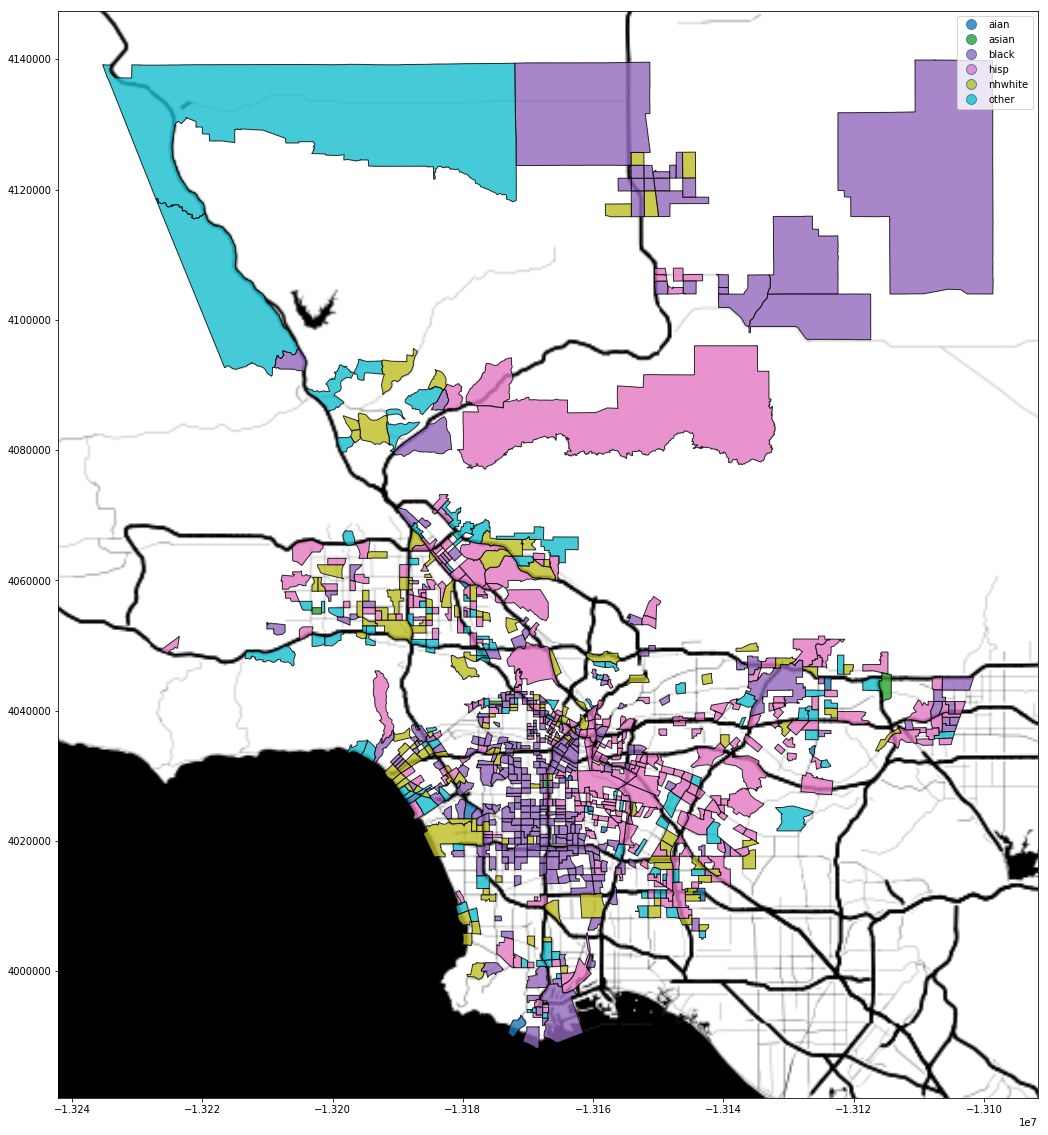

In [3]:
#  Calculate homlessness rates per 100_000 populatino by race. 
# This is an odd sort of metric, since the homeless population is much more transient than 
# than the population counted by the census, so really, the measure is more about the correspondence
# between the r/e of the tract and the r/e of the local homeless pop. 
#
# Also, the homeless pop is frequently located in non-residential areas, so you can get per-pop rates that
# are much larger than 1. 

hsr = hs[hs.geoid.notnull()].groupby(['geoid','raceeth']).sum()['count'].to_frame()

t = raceeth.unstack().to_frame().reorder_levels([1,0]).sort_index(0)
t.index.names = ['geoid', 'raceeth']
t.columns = ['total']
t = hsr.reset_index().merge(t.reset_index(), on=['geoid', 'raceeth'])
t['rate'] = (t['count']/t.total * 100_000).replace(np.inf, np.nan).fillna(0).astype(int, errors='ignore')
hl_rates = t